In [1]:
import cv2
from loguru import logger

In [5]:
# read kz.png 
img = cv2.imread('kz2.png')
# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# threshold
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# show binary 
# cv2.imshow('binary', binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# save to binary.png
cv2.imwrite('binary_2.png', binary)

True

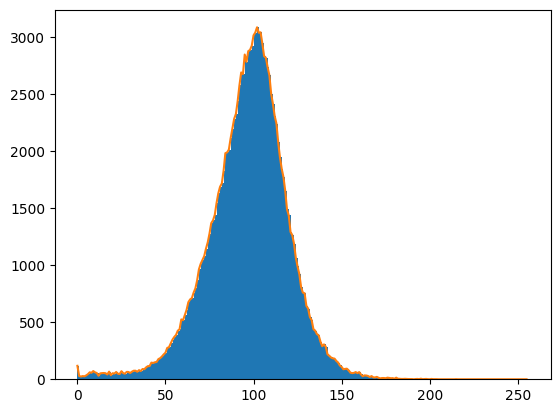

In [11]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('kz2.png')

# 转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])  # 性能：0.025288 s

from matplotlib import pyplot as plt
plt.hist(gray.ravel(), 256, [0, 256])
plt.plot(hist)
# plt.plot(gray)

In [12]:
# hist.max()
# calc mean hist value
# mean_hist = np.mean(hist)
# mean_hist
# calc mean value
half_num = image.shape[0] * image.shape[1] / 2
tmp_sum = 0
median_val = 0
for i in range(0, 256):
    tmp_sum = tmp_sum + hist[i]
    if tmp_sum > half_num:
        print(i)
        median_val = i 
        break

98


In [23]:
def get_image_median_val(gray_image):
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])  # 性能：0.025288 s
    half_num = gray_image.shape[0] * gray_image.shape[1] / 2
    tmp_sum = 0
    median_val = 0
    for i in range(0, 256):
        tmp_sum = tmp_sum + hist[i]
        if tmp_sum > half_num:
            print(i)
            median_val = i 
            break
    return median_val

In [42]:
import cv2
import numpy as np

# cany 定位算法自动设置预值 http://www.kerrywong.com/2009/05/07/canny-edge-detection-auto-thresholding/

# 读取图像
# image = cv2.imread('kz2.png')
# image = cv2.imread('/tmp/008.png')
# image = cv2.imread('/tmp/008_2.png')
# image = cv2.imread('/tmp/003.png')
image = cv2.imread('/tmp/001.png')
# 转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
median_val = get_image_median_val(gray)
# 使用高斯模糊去噪
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
cv2.imwrite('blurred_2.png', blurred)
# 使用Canny边缘检测
edges = cv2.Canny(blurred, median_val * 0.6, median_val * 1.33)

# 找到轮廓
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 遍历轮廓
for contour in contours:
    # 忽略小轮廓
    if cv2.contourArea(contour) < 200:
        continue
    
    # 获取轮廓的边界框
    x, y, w, h = cv2.boundingRect(contour)
    
    # 在原图上绘制边界框
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imwrite('det_img.png', image)
# 显示结果
# cv2.imshow('Detected Text Location', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


86


True